# Generateur de statistique sur la base des fichiers CSV de l'xp

### Imports

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

# Chargement des CSV
folder_A = "../../output/surveys/groupe_A" # Avec touché social
folder_B = "../../output/surveys/groupe_B" # Sans touché social

### Récupération des données

In [18]:
def loadData(folder_path, groupe_label):
    all_files = glob.glob(os.path.join(folder_path, "*.csv"))
    df_list = []

    for file in all_files:
        print(f"[{groupe_label}] Chargement du fichier : {file}")
        df = pd.read_csv(file, sep=',')
        df['groupe'] = groupe_label
        df_list.append(df)

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Chargement
df_A = loadData(folder_A, "Groupe A")
df_B = loadData(folder_B, "Groupe B")

# Fusion des deux
df_all = pd.concat([df_A, df_B], ignore_index=True)

[Groupe A] Chargement du fichier : ../../output/surveys/groupe_A\1751981100.csv
[Groupe A] Chargement du fichier : ../../output/surveys/groupe_A\1751982985.csv
[Groupe A] Chargement du fichier : ../../output/surveys/groupe_A\1752138277.csv
[Groupe B] Chargement du fichier : ../../output/surveys/groupe_B\1752071841.csv
[Groupe B] Chargement du fichier : ../../output/surveys/groupe_B\1752135028.csv
[Groupe B] Chargement du fichier : ../../output/surveys/groupe_B\1752141967.csv


### Formatage des données

In [19]:
stats = []
groupes = df_all['groupe'].unique()

for g in groupes:
    df_group = df_all[df_all['groupe'] == g]
    df_facile = df_group[df_group['question'] == 'facile']
    df_immersif = df_group[df_group['question'] == 'immersif']
    df_amical = df_group[df_group['question'] == 'amical']
    df_competent = df_group[df_group['question'] == 'competent']
    df_aide = df_group[df_group['question'] == 'aide']
    df_interagir = df_group[df_group['question'] == 'interagir']
    df_motivation = df_group[df_group['question'] == 'motivation']
    
    stats.append({
        'Groupe': g,
        'Facile /5': df_facile["answer"].mean(),
        'Immersif /5': df_immersif["answer"].mean(),
        'Amical /5': df_amical["answer"].mean(),
        'Compétent /5': df_competent["answer"].mean(),
        'Aide /5': df_aide["answer"].mean(),
        'Interagir /5': df_interagir["answer"].mean(),
        'Motivation /5': df_motivation["answer"].mean()
    })

df_stats = pd.DataFrame(stats)

# Transposer pour avoir groupes en colonnes, stats en lignes
df_stats_T = df_stats.set_index('Groupe').T

# Vérification qu'il y a exactement 2 groupes
if df_stats_T.shape[1] == 2:
    groupe1, groupe2 = df_stats_T.columns
    df_stats_T['Différence'] = df_stats_T[groupe1] - df_stats_T[groupe2]
else:
    print("Il faut exactement 2 groupes pour calculer la différence.")

print(df_stats_T.to_string())



Groupe         Groupe A  Groupe B  Différence
Facile /5      3.000000  3.666667   -0.666667
Immersif /5    3.666667  4.666667   -1.000000
Amical /5      4.333333  4.000000    0.333333
Compétent /5   4.000000  4.333333   -0.333333
Aide /5        4.666667  4.666667    0.000000
Interagir /5   2.333333  4.333333   -2.000000
Motivation /5  4.000000  4.666667   -0.666667


## Graph (Temps normalisé)

<Figure size 1200x800 with 0 Axes>

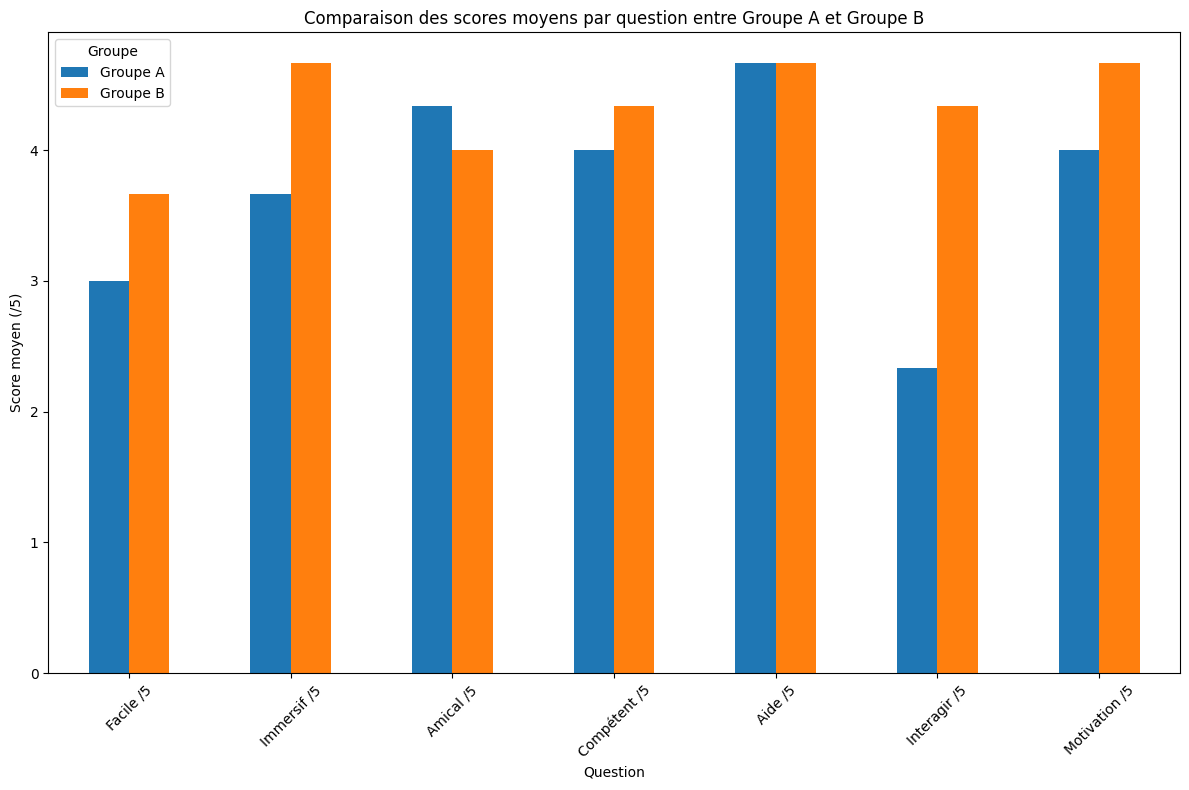

In [20]:
# Visualisation
plt.figure(figsize=(12, 8))
df_stats.set_index('Groupe').T.plot(kind='bar', figsize=(12, 8))
plt.title("Comparaison des scores moyens par question entre Groupe A et Groupe B")
plt.ylabel("Score moyen (/5)")
plt.xlabel("Question")
plt.xticks(rotation=45)
plt.legend(title="Groupe")
plt.tight_layout()
plt.show()